### Minería de Datos y Modelización Predictiva ⛏👷‍
**Master en Big Data & Data Science - Universidad Complutense de Madrid**

**Santiago Torres Busquets**

<h2><u>Ejercicio 2</u></h2>

In [1]:
# tratamiento de datos
import pandas as pd
import numpy as np

# funciones predefinidas vistas en clase
import NuestrasFunciones as nf

# graficos
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

#librerias estadisticas
import scipy.stats as stats
import statsmodels.api as sm

# ignorar warnings
import warnings
warnings.filterwarnings('ignore')

### Lectura y decomposición de la serie

In [2]:
# dataset defunciones
df = pd.read_excel("C:\\Users\\Santiago\\Documents\\Santiago\\Maestria\\UCM\\Modulos\\Mineria de Datos y Modelizacion Predictiva\\Tarea Mineria de Datos\\defunciones.xlsx")
df

,,Todas las causas,Tumores,Causas externas
0,1980M01,28681,4883,1277
1,1980M02,23906,4493,1122
2,1980M03,25275,4957,1244
3,1980M04,22500,4523,1214
4,1980M05,22781,4893,1228
...,...,...,...,...
463,2018M08,33177,9370,1472
464,2018M09,30293,9079,1306
465,2018M10,32879,9629,1275
466,2018M11,34338,9315,1234


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0                     468 non-null    object
 1   Todas las causas  468 non-null    int64 
 2   Tumores           468 non-null    int64 
 3   Causas externas   468 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 14.8+ KB


In [4]:
# Convierto en serie temporal
df['Fecha'] = df.iloc[:,0].apply(lambda x: x.replace('M','-'))
df.set_index(['Fecha'],inplace=True)
df.index=pd.to_datetime(df.index)
df = df.drop([' '],axis=1)
df.head()

,Todas las causas,Tumores,Causas externas
Fecha,,,
1980-01-01,28681,4883,1277
1980-02-01,23906,4493,1122
1980-03-01,25275,4957,1244
1980-04-01,22500,4523,1214
1980-05-01,22781,4893,1228


Elijo realizar el análisis en base a la columna de todas las causas de defunciones.

## Estudio Descriptivo

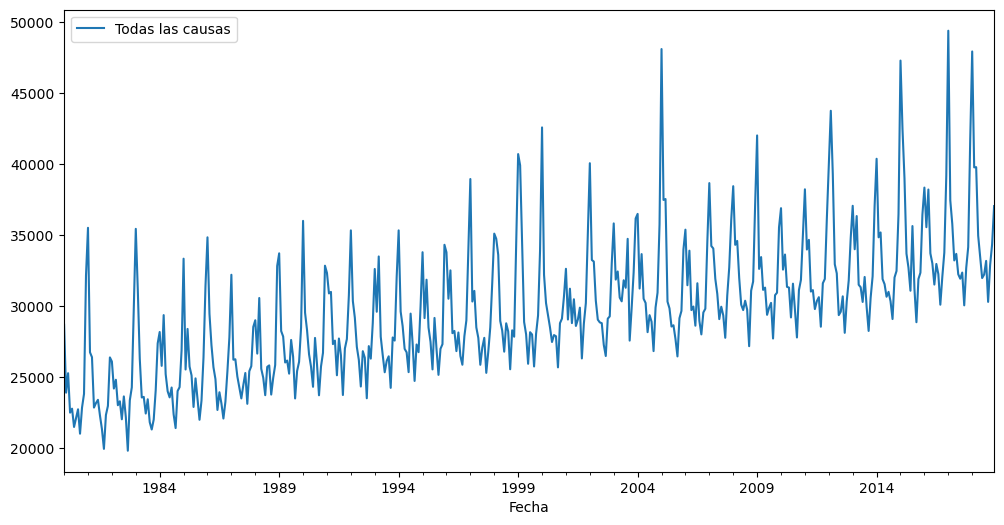

In [5]:
# Grafico con serie
plt.rcParams["figure.figsize"] = (12,6)
df['Todas las causas'].plot()
plt.legend()
plt.show()

test de Dickey Fuller para la estacionariedad de la serie al natural.

In [6]:
nf.test_stationarity(df['Todas las causas'])

Results of Dickey-Fuller Test:
Test Statistic                  -0.942604
p-value                          0.773619
#Lags Used                      14.000000
Number of Observations Used    453.000000
Critical Value (1%)             -3.444868
Critical Value (5%)             -2.867941
Critical Value (10%)            -2.570180
dtype: float64


Para la serie "todas las causas" no podemos rechazar la hipótesis nula de no estacionariedad ya que $p > 0.05$

## Decomposición de la serie

### Decomposición aditiva

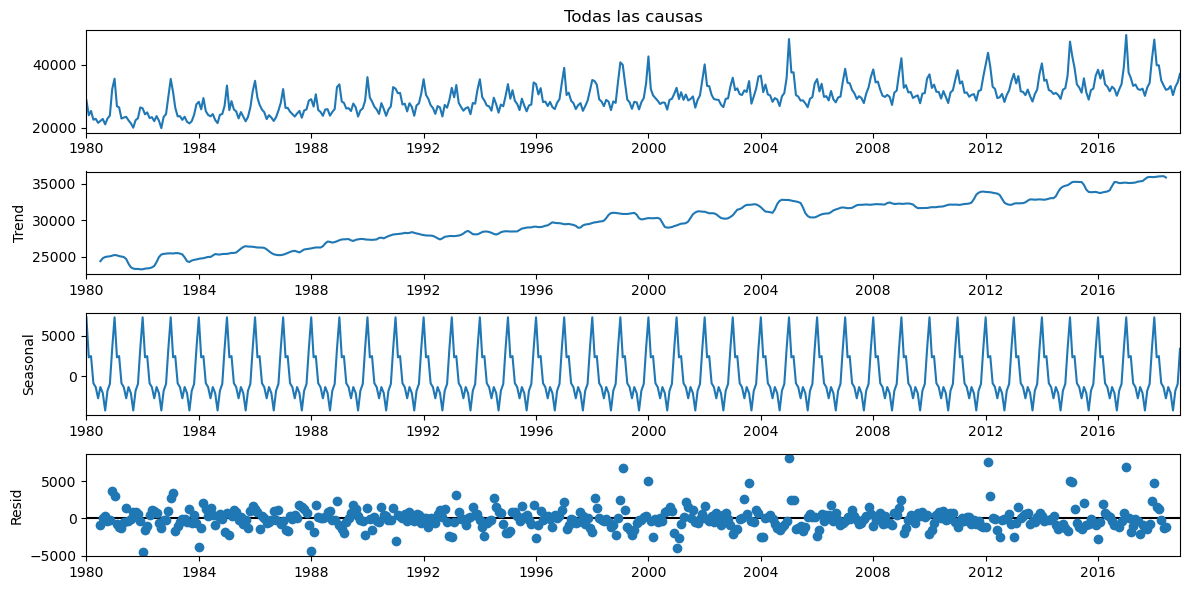

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Aplicar descomposición aditiva
def_desc_Ad = seasonal_decompose(df['Todas las causas'], model='additive',period=12)
def_desc_Ad.plot()
plt.show()

Evaluamos estacionariedad de los residuos de la descomposición aditiva.

In [8]:
nf.test_stationarity(def_desc_Ad.resid.dropna())

Results of Dickey-Fuller Test:
Test Statistic                -9.833132e+00
p-value                        4.975783e-17
#Lags Used                     1.800000e+01
Number of Observations Used    4.370000e+02
Critical Value (1%)           -3.445403e+00
Critical Value (5%)           -2.868177e+00
Critical Value (10%)          -2.570305e+00
dtype: float64


### Decomposición multiplicativa

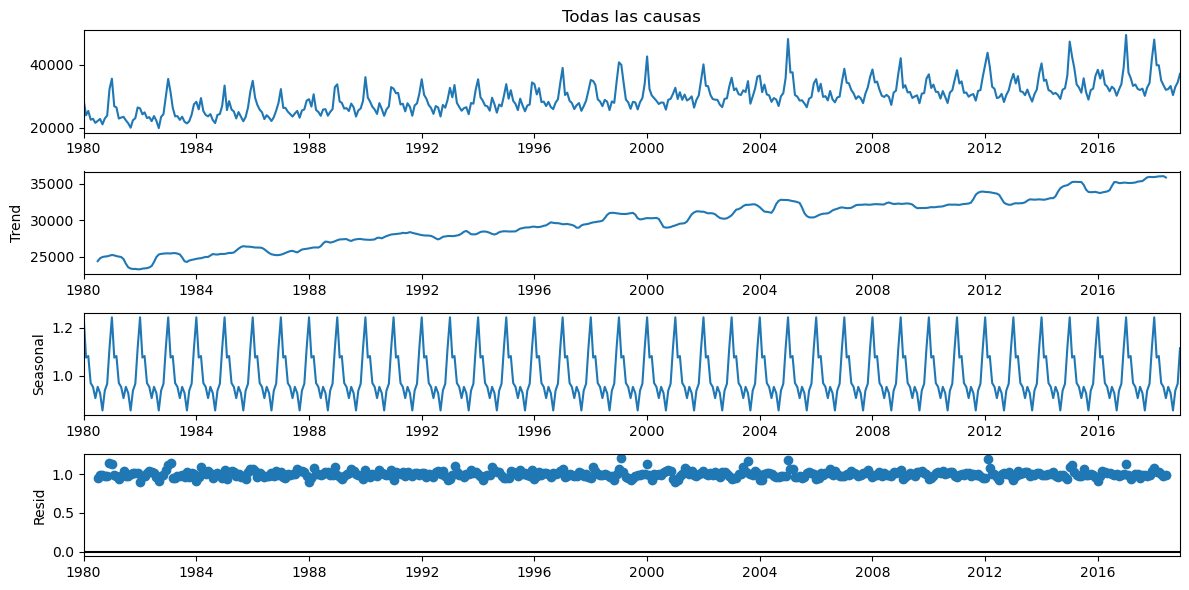

In [9]:
# Aplicar descomposición multiplicativa
def_desc_Mul = seasonal_decompose(df['Todas las causas'], model='multiplicative',period=12)
def_desc_Mul.plot()
plt.show()

Evaluamos estacionariedad de los residuos de la descomposición Multiplicativa.

In [10]:
nf.test_stationarity(def_desc_Mul.resid.dropna())

Results of Dickey-Fuller Test:
Test Statistic                -9.977362e+00
p-value                        2.159804e-17
#Lags Used                     1.700000e+01
Number of Observations Used    4.380000e+02
Critical Value (1%)           -3.445368e+00
Critical Value (5%)           -2.868161e+00
Critical Value (10%)          -2.570297e+00
dtype: float64


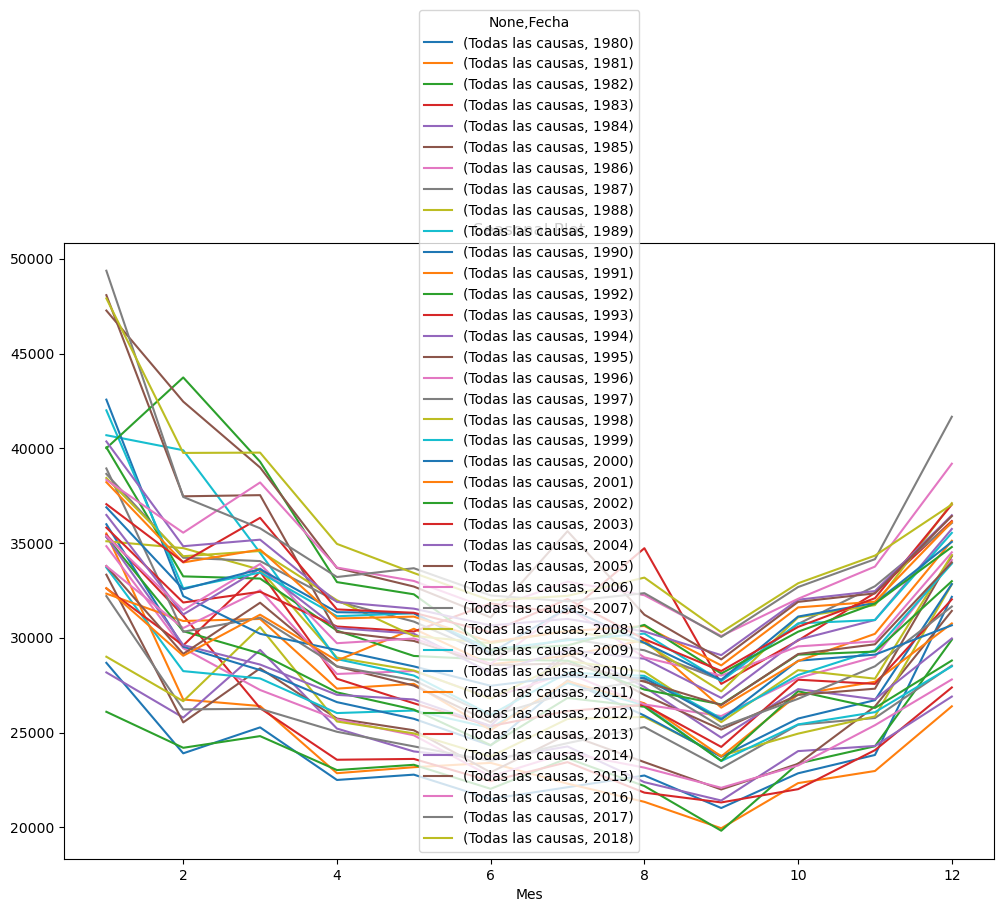

In [11]:
def_todas = df['Todas las causas']
nf.seasonal_plot(df, column="Todas las causas")
plt.rcParams["figure.figsize"] = (12,10)
plt.title('Seasonal Plot')
plt.xlabel('Mes')
plt.show();

## Estabilización de la varianza. Transformación Logaritmica

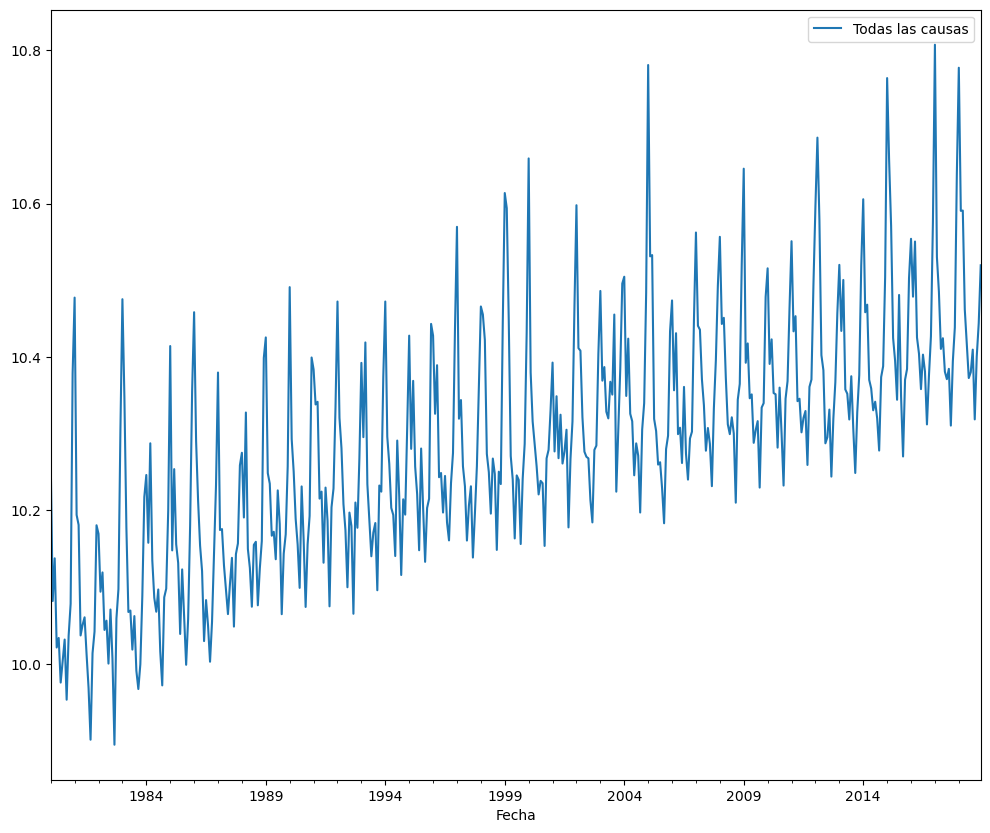

In [12]:
defLog = np.log(def_todas)
defLog.plot()
plt.rcParams["figure.figsize"] = (9,6)
plt.legend()
plt.show()

**Diferenciación regular**

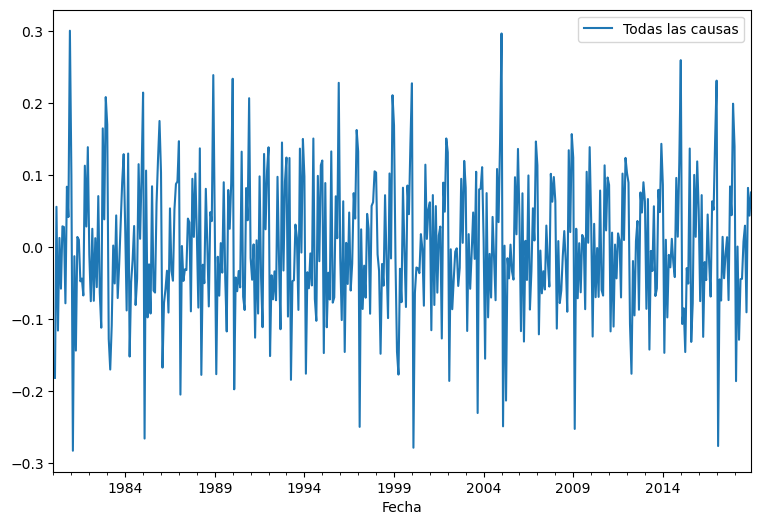

In [13]:
defLog_diff_1 = defLog.diff(periods=1)
defLog_diff_1.plot()
plt.rcParams["figure.figsize"] = (9,7)
plt.legend()
plt.show()

**Diferenciación estacional**

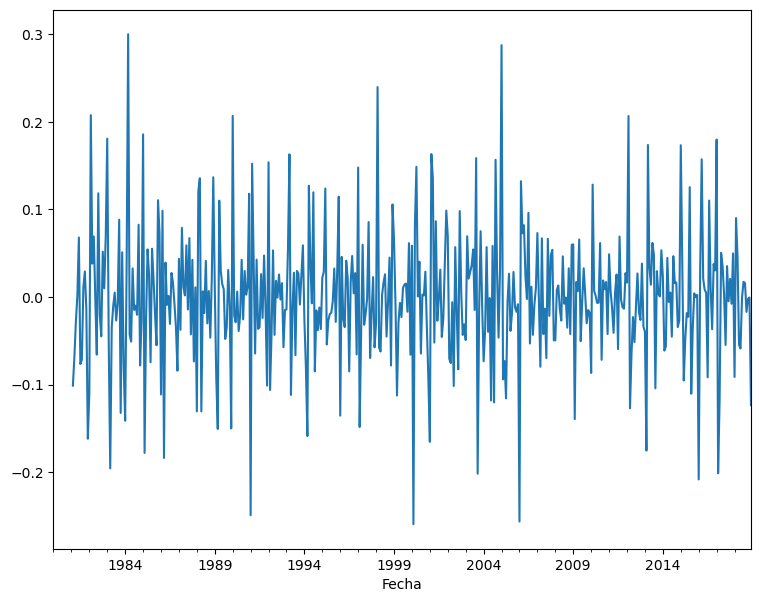

In [14]:
defLog_diff_1_12 = defLog_diff_1.diff(periods=12)
defLog_diff_1_12.plot()
plt.rcParams["figure.figsize"] = (9,7)
plt.show()

**Comprobación de estacionariedad**

In [15]:
nf.test_stationarity(defLog_diff_1_12.dropna(inplace=False))

Results of Dickey-Fuller Test:
Test Statistic                -1.029023e+01
p-value                        3.586141e-18
#Lags Used                     1.700000e+01
Number of Observations Used    4.370000e+02
Critical Value (1%)           -3.445403e+00
Critical Value (5%)           -2.868177e+00
Critical Value (10%)          -2.570305e+00
dtype: float64


**Autocorrelaciones**

In [16]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

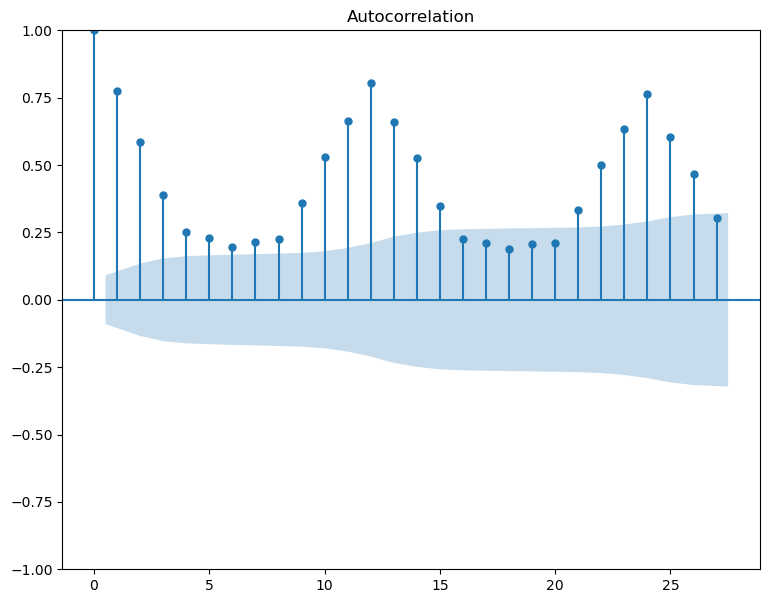

In [17]:
plot_acf(def_todas.dropna(inplace=False))
plt.show()

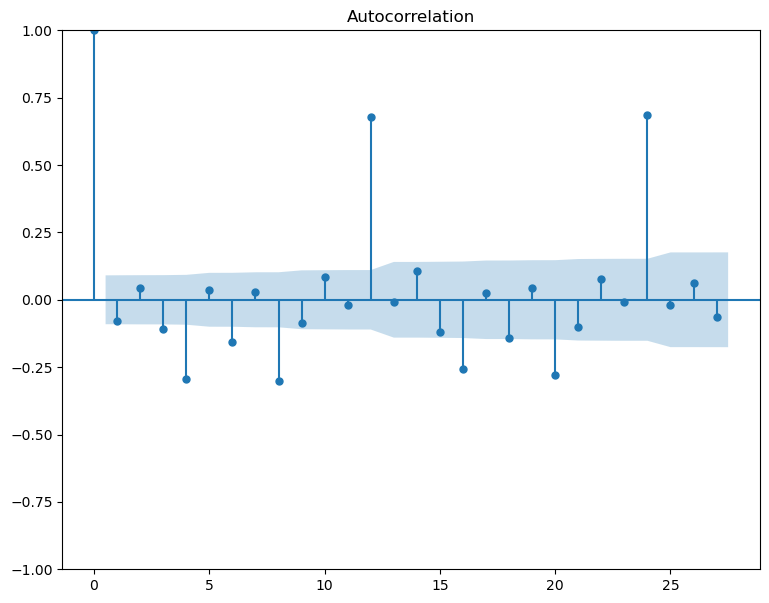

In [18]:
plot_acf(defLog_diff_1.dropna(inplace=False))
plt.show()

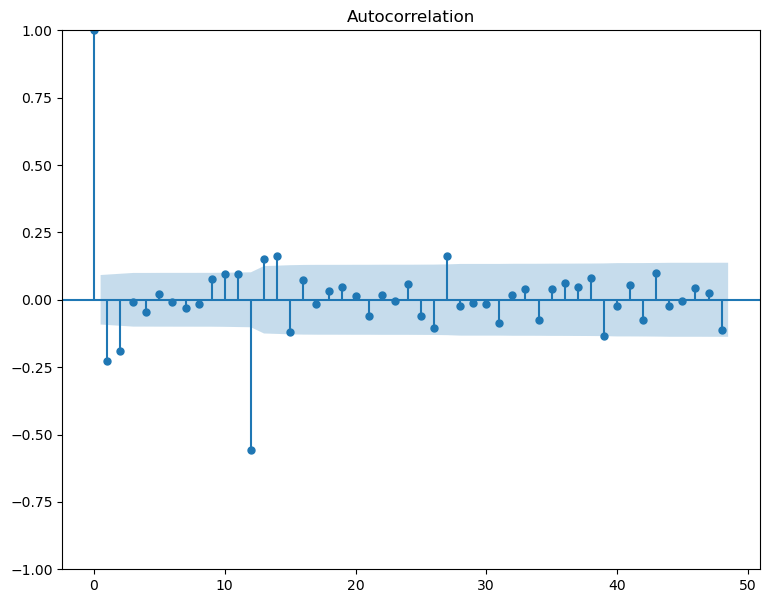

In [19]:
plot_acf(defLog_diff_1_12.dropna(inplace=False), lags=48)
plt.show()

In [20]:
# Test Ljung-box
sm.stats.acorr_ljungbox(defLog_diff_1_12.dropna(inplace=False), lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,49.055084,3.979652e-07


In [21]:
sm.stats.acorr_ljungbox(def_todas, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,830.660066,5.272461e-172


## Particion training y test

In [22]:
import statsmodels.tsa.holtwinters as ets
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Generamos la serie logaritmica
defLog = df.copy()
defLog['Todas las causas'] = np.log(defLog['Todas las causas'])
defLog


def_tr = defLog[:'2016-12-01']
def_tst = defLog['2017-01-01':]
def_tst.iloc[:,1]

Fecha
2017-01-01    10558
2017-02-01     8954
2017-03-01     9581
2017-04-01     9032
2017-05-01     9385
2017-06-01     8922
2017-07-01     9373
2017-08-01     9271
2017-09-01     9078
2017-10-01     9512
2017-11-01     9594
2017-12-01    10006
2018-01-01    10260
2018-02-01     8947
2018-03-01     9638
2018-04-01     9005
2018-05-01     9350
2018-06-01     9159
2018-07-01     9219
2018-08-01     9370
2018-09-01     9079
2018-10-01     9629
2018-11-01     9315
2018-12-01     9743
Name: Tumores, dtype: int64

## Modelos de Suavizado Exponencial

**Suavizado de Holt-Winters Aditivo**

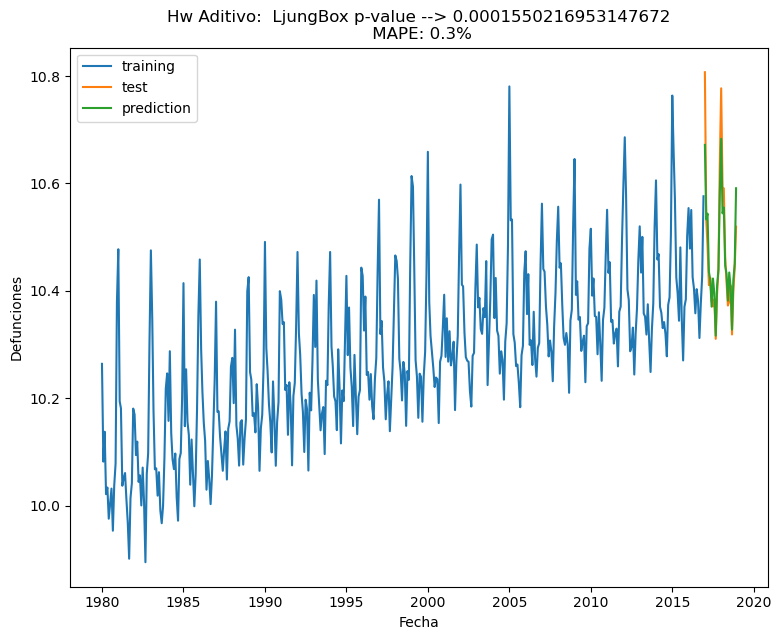

0.0001550216953147672


In [23]:
# Función para evaluar modelo
def eval_model(model,tr,tst,name='Model',lags=12):
    lb = np.mean(sm.stats.acorr_ljungbox(model.resid, lags=lags, return_df=True).lb_pvalue)
    pred = model.forecast(steps=len(tst))
    fig1, ax = plt.subplots()
    ax.plot(tr, label='training')
    ax.plot(tst, label='test')
    ax.plot(pred, label='prediction')
    plt.legend(loc='upper left')
    tit = name + ":  LjungBox p-value --> " + str(lb) + "\n MAPE: " + str(round(mean_absolute_percentage_error(tst, pred)*100,2)) + "%"
    plt.title(tit)
    plt.ylabel('Defunciones')
    plt.xlabel('Fecha')
    plt.show()
    print(lb)

hw_add = ets.ExponentialSmoothing(def_tr['Todas las causas'],trend='add', damped_trend=False, seasonal='add').fit()
hw_add.summary()
eval_model(hw_add,def_tr['Todas las causas'],def_tst['Todas las causas'],'Hw Aditivo')

**Suavizado de Holt-Winters multiplicativo**

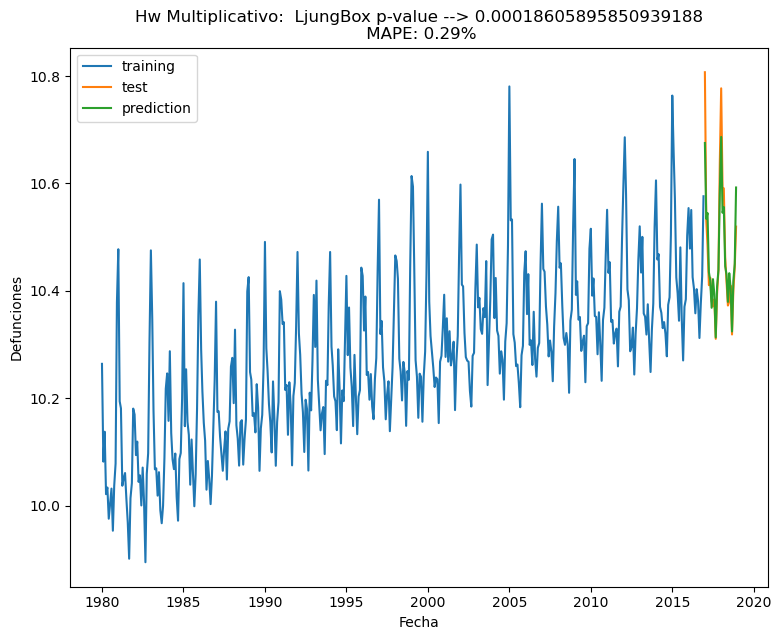

0.00018605895850939188


In [24]:
hw_mul = ets.ExponentialSmoothing(def_tr['Todas las causas'],trend='mul', damped_trend=False, seasonal='mul').fit()
hw_mul.summary()

eval_model(hw_mul,def_tr['Todas las causas'],def_tst['Todas las causas'],'Hw Multiplicativo')

Ambos tipos de Suavizado pasan el test de Ljung-Box.

**Autocorrelaciones con Intervalos de Confianza**

Correlogramas de los residuos:

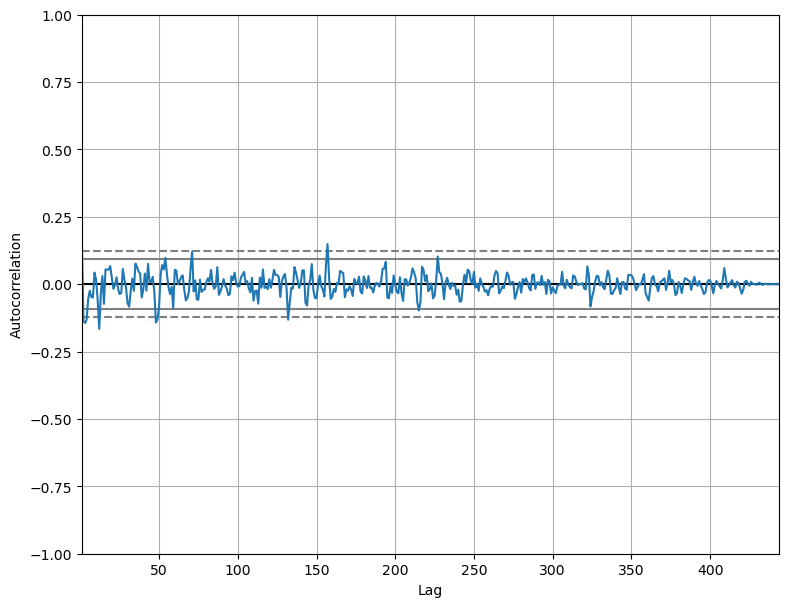

In [25]:
# autocorrelacion modelo multiplicativo
from pandas.plotting import autocorrelation_plot

plt.clf()
autocorrelation_plot(hw_mul.resid)
plt.show()

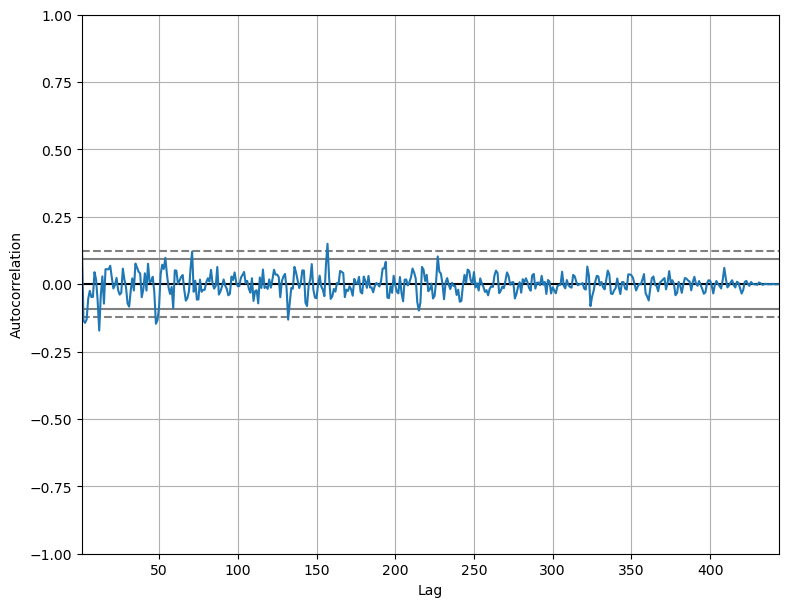

In [26]:
# autocorrelacion modelo aditivo
plt.clf()
autocorrelation_plot(hw_add.resid)
plt.show()

## Modelos ARIMA
### ARIMA manual

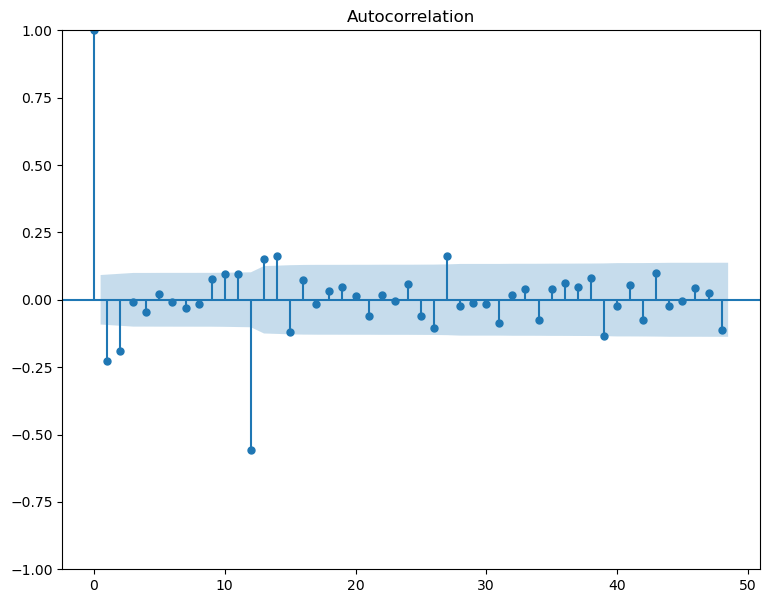

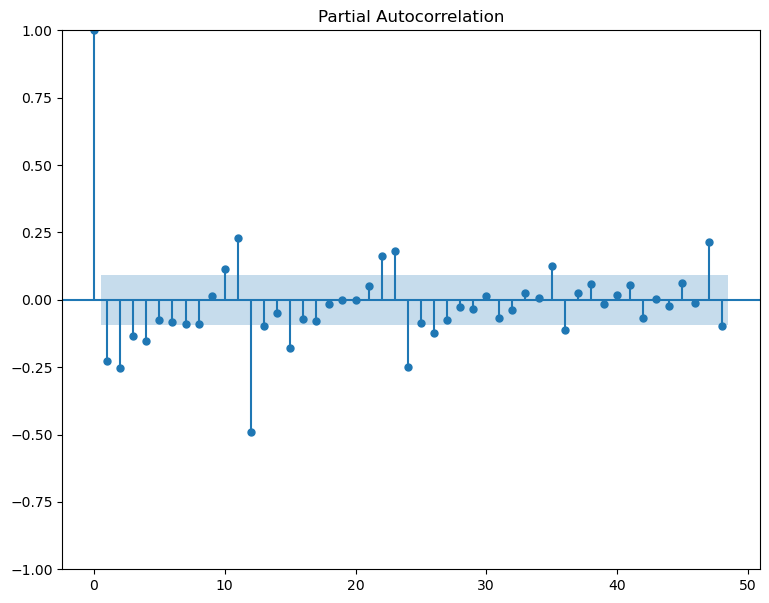

In [27]:
plot_acf(defLog_diff_1_12.dropna(inplace=False),lags=48)
plt.show()
plot_pacf(defLog_diff_1_12.dropna(inplace=False),lags=48,method='ywm')
plt.show()

In [28]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
arima1 = SARIMAX(def_tr['Todas las causas'], 
                order = (0, 1, 1), 
                seasonal_order =(0, 1, 1, 12))
  
arima_1 = arima1.fit()
arima_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                   Todas las causas   No. Observations:                  444
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 682.469
Date:                            Thu, 09 Mar 2023   AIC                          -1358.938
Time:                                    23:18:22   BIC                          -1346.740
Sample:                                01-01-1980   HQIC                         -1354.122
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5498      0.038    -14.483      0.000      -0.624      -0.475
ma.S.L12      -0.9954      0.409     -2.435      0.015      -1.797      -0.194
sigma2         0.0022      0.001      2.529      0.011       0.001       0.004
===================================================================================
Ljung-Box (L1) (Q):                   9.67   Jarque-Bera (JB):               157.55
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                             0.68
Prob(H) (two-sided):                  0.17   Kurtosis:                         5.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

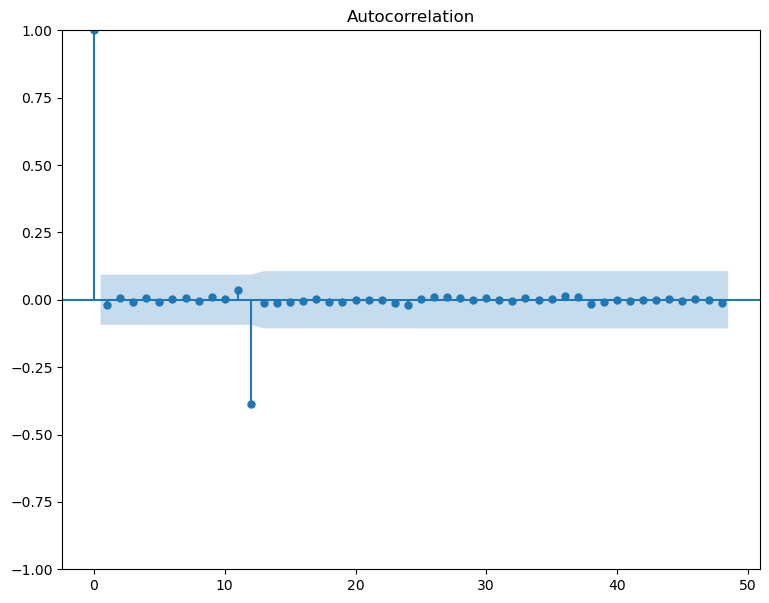

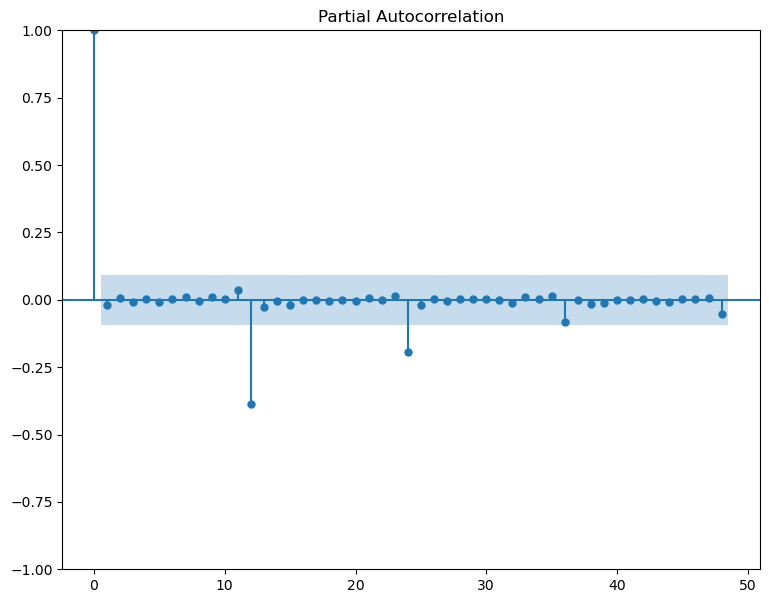

In [29]:
plot_acf(arima_1.resid,lags=48)
plt.show()
plot_pacf(arima_1.resid,lags=48,method='ywm')
plt.show()

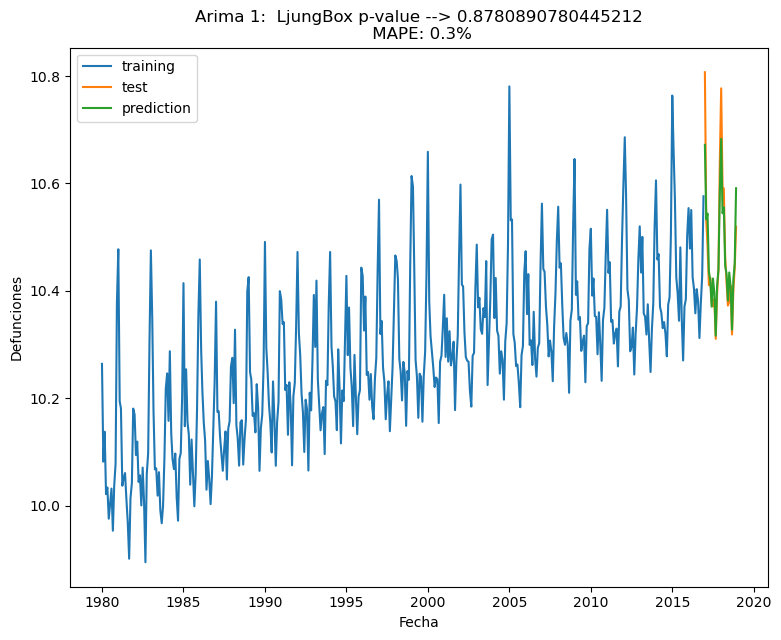

0.8780890780445212


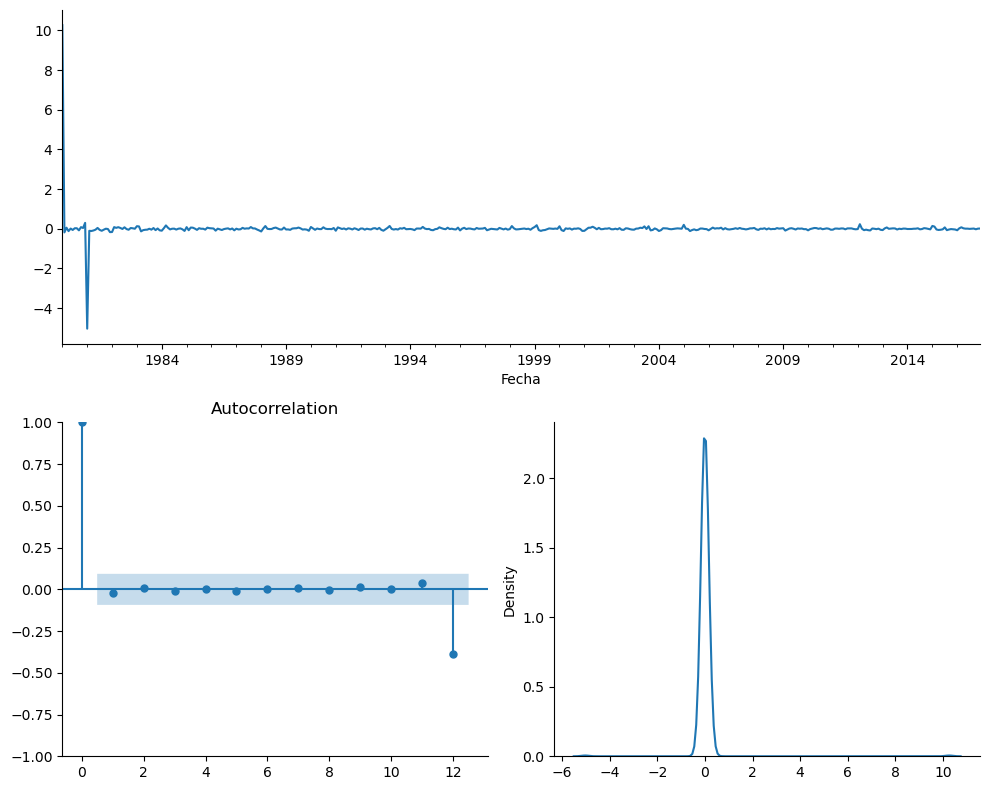

** Mean of the residuals:  0.01

** Ljung Box Test, p-value: 0.878 (>0.05, Uncorrelated)

** Jarque Bera Normality Test, p_value: 0.0 (<0.05, Not-normal)

** AD Fuller, p_value: 0.0 (<0.05, Stationary)


(<AxesSubplot:xlabel='Fecha'>,
 <AxesSubplot:title={'center':'Autocorrelation'}>,
 <AxesSubplot:ylabel='Density'>)

In [30]:
eval_model(arima_1,def_tr['Todas las causas'],def_tst['Todas las causas'],'Arima 1')

nf.residcheck(arima_1.resid,12)

El modelo ARIMA manual no pasa el test de Ljung-Box, implicando que los datos están no correlacionados o distribuidos de manera independiente.

### ARIMA automático

In [31]:
import pmdarima as pm

# Ajustamos modelo arima step-wise con métrica AIC para la serie de vuelos
arima_auto = pm.auto_arima(def_tr['Todas las causas'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      #start_P=None, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(arima_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=-1235.897, Time=3.72 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-424.481, Time=0.24 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-1187.582, Time=2.43 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-904.066, Time=0.83 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3331.164, Time=0.06 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=-1006.921, Time=2.96 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=-1185.545, Time=1.57 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=-1277.005, Time=10.96 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=-1281.791, Time=10.58 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=-800.463, Time=9.18 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=10.55 sec
 ARIMA(2,0,1)(2,0,0)[12] intercept   : AIC=-1264.302, Time=17.82 sec
 ARIMA(1,0,2)(2,0,0)[12] intercept   : AIC=-1279.643, Time=13.32 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=-1029.249, Time=10.15 sec
 ARIMA(0,

El mejor model ARIMA automático (1,0,1)(2,0,0) si pasa el test de Ljung-Box.

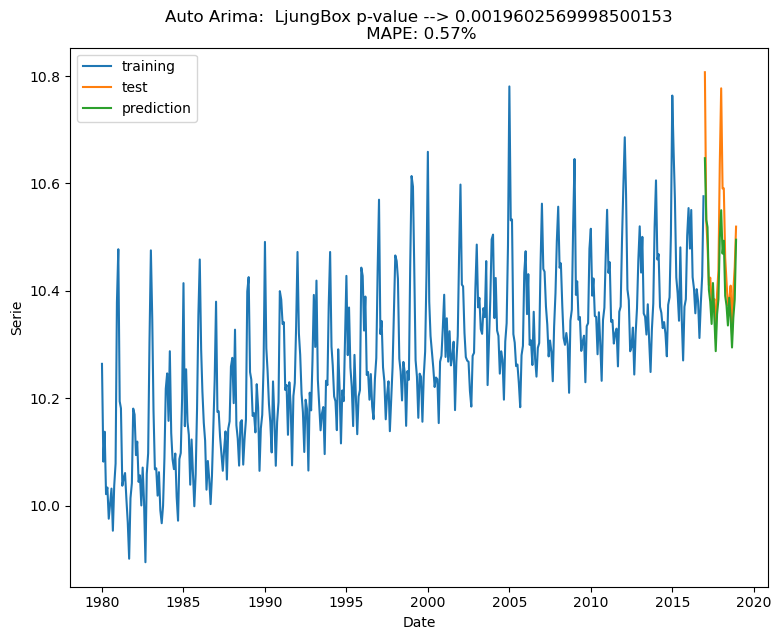

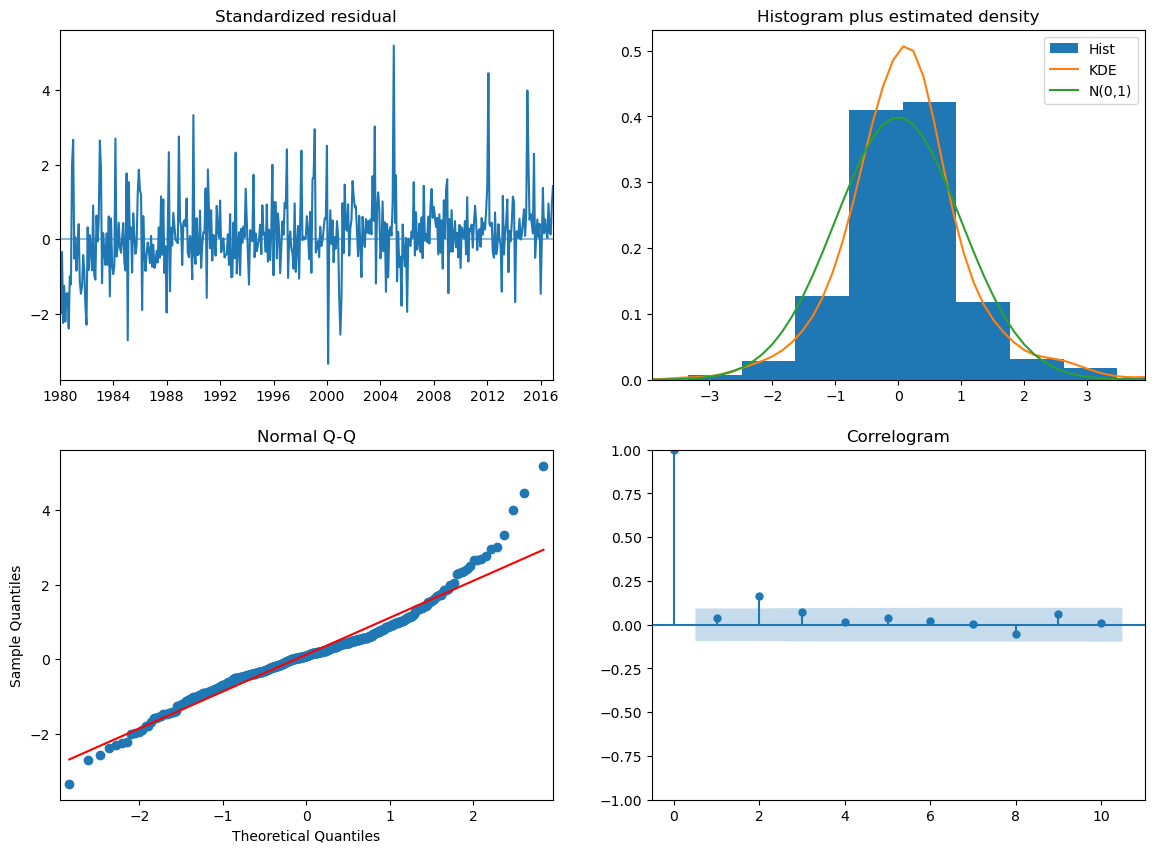

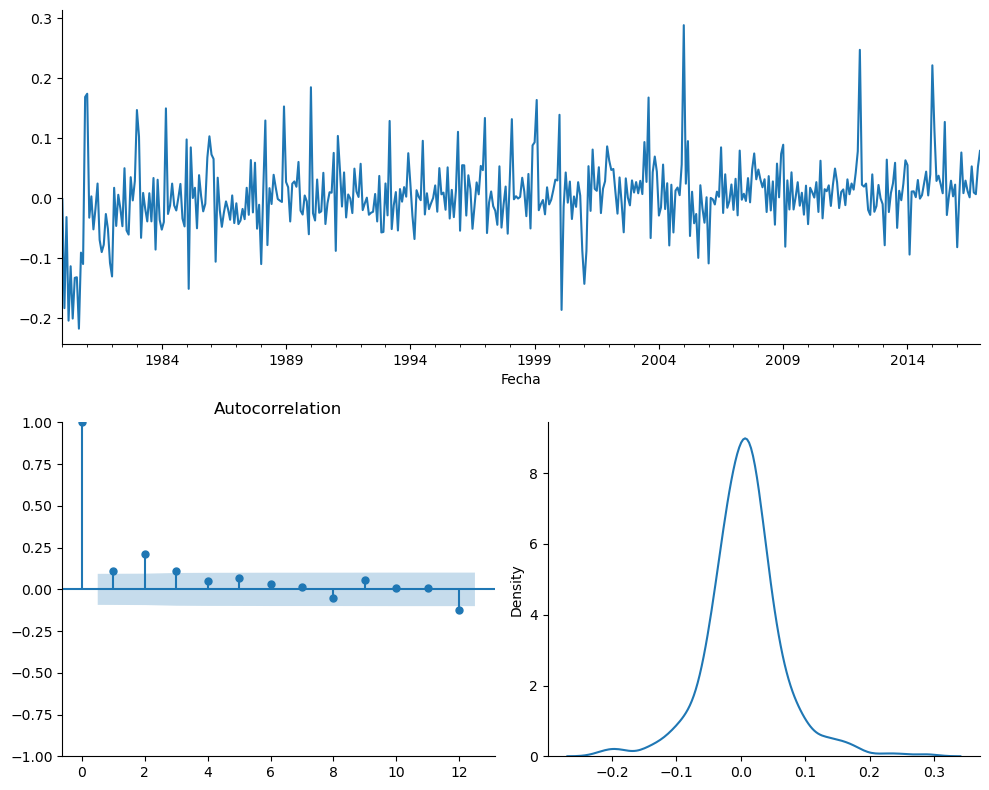

** Mean of the residuals:  0.01

** Ljung Box Test, p-value: 0.002 (<0.05, Correlated)

** Jarque Bera Normality Test, p_value: 0.0 (<0.05, Not-normal)

** AD Fuller, p_value: 0.001 (<0.05, Stationary)


In [32]:
nf.eval_model_Aarima(arima_auto,def_tr['Todas las causas'],def_tst['Todas las causas'],'Auto Arima')
nf.residcheck(arima_auto.resid(),12);